In [1]:
import pandas as pd

In [2]:
#Series de pandas
numeros = [3,4,5,6,7]
serie = pd.Series(numeros)
serie, type(serie)

(0    3
 1    4
 2    5
 3    6
 4    7
 dtype: int64,
 pandas.core.series.Series)

In [3]:
data = {
    "Nombre" : ["Ana", "Pedro", "Maria", "Luis", "Juan"],
    "Edad" : [22,25,34,21,28],
    "Ciudad": ["Sonsonate", "Santa Ana", "San Salvador","San Miguel", "Usulutan"]
}

data, type(data)

({'Nombre': ['Ana', 'Pedro', 'Maria', 'Luis', 'Juan'],
  'Edad': [22, 25, 34, 21, 28],
  'Ciudad': ['Sonsonate',
   'Santa Ana',
   'San Salvador',
   'San Miguel',
   'Usulutan']},
 dict)

In [4]:
#Generar un DataFrame apartir de un diccionario

df = pd.DataFrame(data=data)

df

,Nombre,Edad,Ciudad
0,Ana,22,Sonsonate
1,Pedro,25,Santa Ana
2,Maria,34,San Salvador
3,Luis,21,San Miguel
4,Juan,28,Usulutan


In [5]:
# exportar DataFrame

df.to_csv("data.csv")

In [6]:
# importar un DataFrame

import_df = pd.read_csv("data.csv", index_col=0)
import_df

,Nombre,Edad,Ciudad
0,Ana,22,Sonsonate
1,Pedro,25,Santa Ana
2,Maria,34,San Salvador
3,Luis,21,San Miguel
4,Juan,28,Usulutan


In [7]:
nombres = df["Nombre"]
print(nombres, type(nombres))

0      Ana
1    Pedro
2    Maria
3     Luis
4     Juan
Name: Nombre, dtype: object <class 'pandas.core.series.Series'>


In [8]:
# Seleccionar una o mas columnas
df = pd.DataFrame(data=data)
df[["Nombre","Edad"]]
#print(type(df))

,Nombre,Edad
0,Ana,22
1,Pedro,25
2,Maria,34
3,Luis,21
4,Juan,28


In [9]:
# filtrar por indice
fila = df.loc[2]
fila

Nombre           Maria
Edad                34
Ciudad    San Salvador
Name: 2, dtype: object

In [10]:
#filtrar por condiciones
df [df['Edad']>23]

,Nombre,Edad,Ciudad
1,Pedro,25,Santa Ana
2,Maria,34,San Salvador
4,Juan,28,Usulutan


In [11]:
#filtrar por dos condiciones
filtro = (df['Edad']>23) & (df['Nombre'].str.startswith('P'))
df[filtro]

,Nombre,Edad,Ciudad
1,Pedro,25,Santa Ana


In [12]:
#filtrar por query
df.query('Edad < 23')

,Nombre,Edad,Ciudad
0,Ana,22,Sonsonate
3,Luis,21,San Miguel


In [13]:
# extraer nombres especificos
df[df['Nombre'].isin(['Ana','Carlos','Juan'])]

,Nombre,Edad,Ciudad
0,Ana,22,Sonsonate
4,Juan,28,Usulutan


In [14]:
#filtro usando funcion
def longitud_5(nombre):
    return len(nombre) == 5
df[df['Nombre'].apply(longitud_5)] 

,Nombre,Edad,Ciudad
1,Pedro,25,Santa Ana
2,Maria,34,San Salvador


In [15]:
#filtrar por edades entre 25 y 35 (inclusive)
df[df['Edad'].between(25,35)]

,Nombre,Edad,Ciudad
1,Pedro,25,Santa Ana
2,Maria,34,San Salvador
4,Juan,28,Usulutan


In [16]:
import numpy as np


In [17]:
data = {
    "Nombre" : ["Ana", "Pedro", "Maria", "Luis", "Juan"],
    "Edad" : [22,25,np.nan,21,28],
    "Ciudad": ["Sonsonate", "Santa Ana", "San Salvador",None, "Usulutan"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
2,Maria,NaN,San Salvador
3,Luis,21.0,None
4,Juan,28.0,Usulutan


In [18]:
#Rellenar los valores faltantes
df_fill = df.fillna(
    {
        'Edad' : df['Edad'].mean(), # si el valor de la edad es nulo lo reemplaza por la edad promedio
        'Ciudad' : 'Desconocido'
    }
)
df_fill 

,Nombre,Edad,Ciudad
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
2,Maria,24.0,San Salvador
3,Luis,21.0,Desconocido
4,Juan,28.0,Usulutan


In [19]:
#eliminacion de fila con valores faltantes
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
4,Juan,28.0,Usulutan


In [20]:
#reemplazar valores especificos de alguna columna
df_reem = df.replace(
    {
        "Ciudad" : {None : 'Desconocido'}
    }
)
df_reem

,Nombre,Edad,Ciudad
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
2,Maria,NaN,San Salvador
3,Luis,21.0,Desconocido
4,Juan,28.0,Usulutan


In [21]:
# Interpolar valores
df_interpolado = df.copy()
df_interpolado['Edad'] = df['Edad'].interpolate()
df_interpolado

,Nombre,Edad,Ciudad
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
2,Maria,23.0,San Salvador
3,Luis,21.0,None
4,Juan,28.0,Usulutan


In [22]:
data_duplicada = {
    "Nombre" : ["Ana", "Pedro", "Maria", "Luis", "Juan","Ana","Pedro"],
    "Edad" : [22,25,np.nan,21,28,22,25],
    "Ciudad": ["Sonsonate", "Santa Ana", "San Salvador",None, "Usulutan","Sonsonate","Santa Ana"]
}
df_duplicado = pd.DataFrame(data_duplicada)
df_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
2,Maria,NaN,San Salvador
3,Luis,21.0,None
4,Juan,28.0,Usulutan
5,Ana,22.0,Sonsonate
6,Pedro,25.0,Santa Ana


In [23]:
# eliminar elementos duplicados
df_sin_duplicado = df_duplicado.drop_duplicates()
df_sin_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
2,Maria,NaN,San Salvador
3,Luis,21.0,None
4,Juan,28.0,Usulutan


In [24]:
# renombrar columnas 
df_renombrado = df.rename(
    columns={
        "Nombre" : "Name",
        "Edad" : "Age",
        "Ciudad" : "City"
    }
)
df_renombrado

,Name,Age,City
0,Ana,22.0,Sonsonate
1,Pedro,25.0,Santa Ana
2,Maria,NaN,San Salvador
3,Luis,21.0,None
4,Juan,28.0,Usulutan


In [25]:
# ordenar columnas
columnas_ordenadas = ["Ciudad","Edad","Nombre"]
df_ordenado = df[columnas_ordenadas]
df_ordenado

,Ciudad,Edad,Nombre
0,Sonsonate,22.0,Ana
1,Santa Ana,25.0,Pedro
2,San Salvador,NaN,Maria
3,None,21.0,Luis
4,Usulutan,28.0,Juan


In [26]:
# transformacion de datos
def cuadrado(x):
    return x**2

df["Edad_cuadrado"] = df["Edad"].apply(cuadrado)
df

,Nombre,Edad,Ciudad,Edad_cuadrado
0,Ana,22.0,Sonsonate,484.0
1,Pedro,25.0,Santa Ana,625.0
2,Maria,NaN,San Salvador,NaN
3,Luis,21.0,None,441.0
4,Juan,28.0,Usulutan,784.0


In [27]:
# agrupacion de datos
data = {'Nombre': ['Juan','Ana','Luis','Laura','Pedro','Carla'],
        'Ciudad': ['Madrid','Barcelona','Madrid','Valencia','Barcelona','Madrid'],
        'Edad': [25,33,30,28,45,38],
        'Puntuacion': [80,90,85,88,75,91]

}
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion
0,Juan,Madrid,25,80
1,Ana,Barcelona,33,90
2,Luis,Madrid,30,85
3,Laura,Valencia,28,88
4,Pedro,Barcelona,45,75
5,Carla,Madrid,38,91


In [28]:
# agrupar por ciudad
grouped = df.groupby('Ciudad')
print(grouped.groups)

{'Barcelona': [1, 4], 'Madrid': [0, 2, 5], 'Valencia': [3]}


In [29]:
# Calcular la suma de las edades y puntuaciones por ciudad
aggregated_data = grouped.agg(
    {
        "Edad" : "mean",
        "Puntuacion" : "sum"
    }
)
aggregated_data 

,Edad,Puntuacion
Ciudad,,
Barcelona,39.0,165
Madrid,31.0,256
Valencia,28.0,88


In [30]:
# definir funcion de agregacion personalizada
def rango(series):
    return series.max() - series.min()

# Aplicar la funcion agg pesonalizada al grupo
aggregated_data_custom = grouped.agg(
    {
        "Edad" : rango,
        "Puntuacion" : rango
    }
)
aggregated_data_custom 

,Edad,Puntuacion
Ciudad,,
Barcelona,12,15
Madrid,13,11
Valencia,0,0


In [31]:
data["Categoria"] = ["A","B","A","B","A","B"]
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion,Categoria
0,Juan,Madrid,25,80,A
1,Ana,Barcelona,33,90,B
2,Luis,Madrid,30,85,A
3,Laura,Valencia,28,88,B
4,Pedro,Barcelona,45,75,A
5,Carla,Madrid,38,91,B


In [32]:
# Agrupar datos por ciudad y categoria
grouped_multi = df.groupby(['Ciudad', 'Categoria'])
grouped_multi.groups

{('Barcelona', 'A'): [4], ('Barcelona', 'B'): [1], ('Madrid', 'A'): [0, 2], ('Madrid', 'B'): [5], ('Valencia', 'B'): [3]}

In [33]:
# Calcular la suma de las edades y puntuacion por ciudad y por categoria
aggregated_data_multi = grouped_multi.agg(
    {
        "Edad" : "sum",
        "Puntuacion" : "mean"
    }
)
aggregated_data_multi

Edad  Puntuacion
Ciudad    Categoria                  
Barcelona A            45        75.0
          B            33        90.0
Madrid    A            55        82.5
          B            38        91.0
Valencia  B            28        88.0

In [34]:
# Agregar una columna 
# Crear una DataFrame de ejemplo
data = {'Nombre': ['Juan', 'Pedro','Ana','Luis'],
        'Edad': [25,33,30,28]}
df = pd.DataFrame(data)
df

,Nombre,Edad
0,Juan,25
1,Pedro,33
2,Ana,30
3,Luis,28


In [35]:
# Agregar una columna 
df["Ciudad"] = ["Sonsonate", "Santa Ana", "Sonsonate", "San Salvador"]
df

,Nombre,Edad,Ciudad
0,Juan,25,Sonsonate
1,Pedro,33,Santa Ana
2,Ana,30,Sonsonate
3,Luis,28,San Salvador


In [36]:
# Generamos una nueva fila 
new_row = pd.Series({"Nombre": "Luis", "Edad": 34, "Ciudad": "San Miguel"})

# Agregamos fila al DataFrame  (el panda series se convierte a Dataframe)
df = pd.concat([df,new_row.to_frame().T], ignore_index=True)
df

,Nombre,Edad,Ciudad
0,Juan,25,Sonsonate
1,Pedro,33,Santa Ana
2,Ana,30,Sonsonate
3,Luis,28,San Salvador
4,Luis,34,San Miguel


In [ ]:
data = {'Nombre': ['Juan', 'Pedro','Ana','Luis'],
        'Edad': [25,33,30,28]}
df1 = pd.DataFrame(data)
df1["Ciudad"] = ["Sonsonate", "Santa Ana", "Sonsonate", "San Salvador"]
df1	
# Creamos otro DataFrame de ejemplo

data2 = {'Nombre': ['Karla', 'Irene'],
         'Edad' : [38,27],
         'Ciudad' : ['Sonsonate','La Libertad']}
df2 = pd.DataFrame(data2)

df1

,Nombre,Edad,Ciudad
0,Juan,25,Sonsonate
1,Pedro,33,Santa Ana
2,Ana,30,Sonsonate
3,Luis,28,San Salvador


In [38]:
df2

,Nombre,Edad,Ciudad
0,Karla,38,Sonsonate
1,Irene,27,La Libertad


In [39]:
# Combinar dos Dataframe
df_combined = pd.concat([df1,df2], ignore_index=True)
df_combined

,Nombre,Edad,Ciudad
0,Juan,25,Sonsonate
1,Pedro,33,Santa Ana
2,Ana,30,Sonsonate
3,Luis,28,San Salvador
4,Karla,38,Sonsonate
5,Irene,27,La Libertad


In [40]:
import numpy as np

In [41]:
# Crear un arreglo con 5 elementos
arr1 = np.array([1,2,3,4,5,6])

print("Arreglo 1D: ", arr1)
print("Forma(shape): ", arr1.shape)
print("Tipo de datos(dtype) ", arr1.dtype)

Arreglo 1D:  [1 2 3 4 5 6]
Forma(shape):  (6,)
Tipo de datos(dtype)  int64


In [42]:
# Cambiar el arreglo por una matriz de 2x3
arr2 = arr1.reshape((2,3))
print("Arreglo 2D:\n ", arr2)
print("Forma(shape): ", arr2.shape)
print("Tipo de datos(dtype) ", arr2.dtype)

Arreglo 2D:
  [[1 2 3]
 [4 5 6]]
Forma(shape):  (2, 3)
Tipo de datos(dtype)  int64


In [43]:
# Crear una matriz con forma (4,4) con numeros aleatorios entre 0 y 1
matrix = np.random.rand(4,4)
print("Arreglo 2D:\n ", matrix)
print("Forma(shape): ", matrix.shape)
print("Tipo de datos(dtype) ", matrix.dtype)

Arreglo 2D:
  [[0.47877159 0.69537516 0.63408877 0.35121228]
 [0.5566261  0.35024978 0.00451667 0.52033815]
 [0.01240085 0.0381785  0.11482443 0.82106526]
 [0.83233453 0.74826564 0.57810513 0.96470705]]
Forma(shape):  (4, 4)
Tipo de datos(dtype)  float64


In [44]:
# Crear una arreglo de 2 dim a partir de una lista de listas
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr, type(arr)) 

[[1 2 3]
 [4 5 6]
 [7 8 9]] <class 'numpy.ndarray'>


In [45]:
# Crear una arreglo de ceros con una forma (3,4)
arr = np.zeros((3,4))
print(arr)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [46]:
# Crear arreglo con unos de la forma (2,2)
arr = np.ones((2,2))
arr[1,1]=10
print(arr)

[[ 1.  1.]
 [ 1. 10.]]


In [47]:
# Crear una matriz identidad (la misma cantidad de filas como columnas)
arr = np.eye(4)
print(arr)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [48]:
# Crear un arreglo 3D de ceros de forma (2,3,4)
arr = np.zeros((2,3,4))
arr[0,1,2] = 5
print(arr)

[[[0. 0. 0. 0.]
  [0. 0. 5. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [49]:
arr = np.random.rand(2,5)
arr

array([[0.81727794, 0.72915068, 0.53045263, 0.67287339, 0.30770565],
       [0.26180498, 0.13004632, 0.53171539, 0.19414781, 0.55904002]])

In [50]:
arr.T  #arreglo transpuesto

array([[0.81727794, 0.26180498],
       [0.72915068, 0.13004632],
       [0.53045263, 0.53171539],
       [0.67287339, 0.19414781],
       [0.30770565, 0.55904002]])

In [51]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
arr1 , arr2

(array([[1, 2],
        [3, 4]]),
 array([[5, 6],
        [7, 8]]))

In [52]:
# concatenar arreglos horizontalmente
arr_h = np.hstack((arr1,arr2))
arr_h

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [53]:
# concatenar arreglos verticalmente
arr_v = np.vstack((arr1,arr2))
arr_v

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [54]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [55]:
# calcular suma de elementos
suma = np.sum(arr)
print(suma)

15


In [56]:
# calcular el promedio de los elementos
promedio = np.mean(arr)
promedio

np.float64(3.0)

In [57]:
# calcular la mediana
mediana = np.median(arr)
mediana

np.float64(3.0)

In [58]:
# calcular el productos de los elementos (factotial)
producto = np.prod(arr)
producto

np.int64(120)

In [59]:
# Desviacion standar
desv_st = np.std(arr)
desv_st

np.float64(1.4142135623730951)

In [60]:
# Varianza
var = np.var(arr)
var

np.float64(2.0)

In [61]:
# Obtener minimo y maximo de los elementos
minimo = np.min(arr)
maximo = np.max(arr)
minimo, maximo

(np.int64(1), np.int64(5))

In [62]:
# calcular la suma acumulativa
acum = np.cumsum(arr)
acum

array([ 1,  3,  6, 10, 15])

In [63]:
# suma element-wise
arr + arr

array([ 2,  4,  6,  8, 10])

In [64]:
# resta element-wise
arr - arr

array([0, 0, 0, 0, 0])

In [65]:
arr * arr

array([ 1,  4,  9, 16, 25])

In [66]:
arr / arr

array([1., 1., 1., 1., 1.])

In [67]:
import pandas as pd
import numpy as np

In [68]:
# Crear un arreglo de numpy
data = np.array([[1,2,3],[4,5,6,],[7,8,9]])

# Crear un DataFrame a partir de un arreglo de numpy
df = pd.DataFrame(data, columns=['A','B','C'])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [69]:
data ={
    'A' : [1,4,7],
    'B' : [2,5,8],
    'C' : [3,6,9]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [70]:
# Convertir un DataFrame en array de numpy
arr = df.to_numpy()
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [71]:
df.values

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [72]:
# Calcular el promedio de cada columna utilizando numpy
mean_columns = np.mean(df, axis=0)
mean_columns

A    4.0
B    5.0
C    6.0
dtype: float64

In [73]:
df.mean(axis=1) # promedio de cada fila

0    2.0
1    5.0
2    8.0
dtype: float64

In [74]:
import matplotlib.pyplot as plt

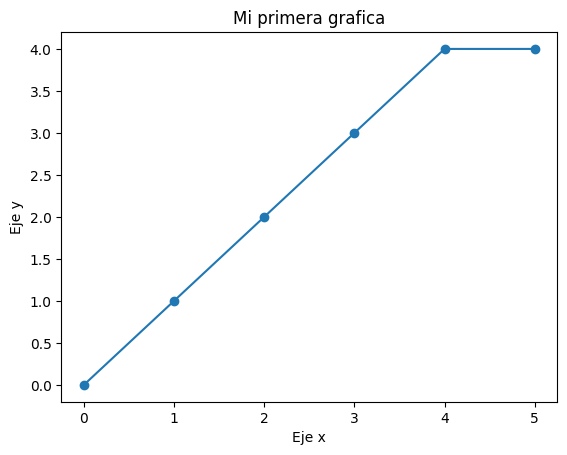

In [75]:
# Ejmeplo de una linea simple 
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,4]

plt.plot(x,y)
plt.scatter(x,y)
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("Mi primera grafica")
plt.show()

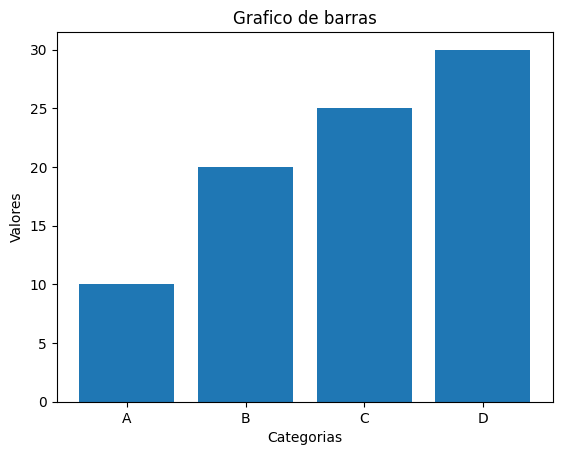

In [76]:
# Grafico de barras 
categorias = ["A", "B","C","D"]
valores = [10,20,25,30]
plt.bar(categorias, valores)
plt.title("Grafico de barras")
plt.xlabel("Categorias")
plt.ylabel("Valores")
plt.show()

In [77]:
plt.style.use("ggplot")
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

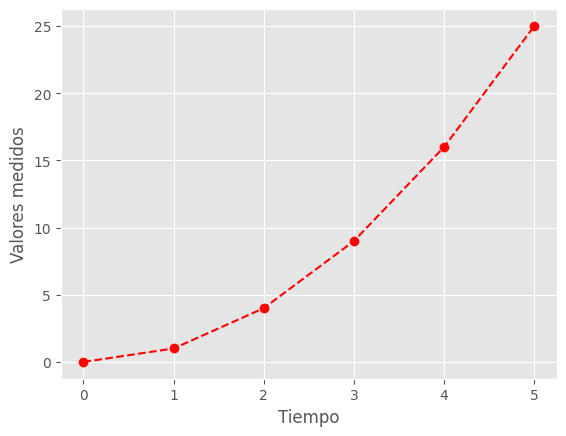

In [78]:
x = [0,1,2,3,4,5]
y = [0,1,4,9,16,25]

plt.plot(x, y, color="red", linestyle="--", marker="o" )
plt.xlabel("Tiempo")
plt.ylabel("Valores medidos")
plt.show()

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:

data = sns.load_dataset("iris")
data, set(data["species"])

(     sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 {'setosa', 'versicolor', 'virginica'})

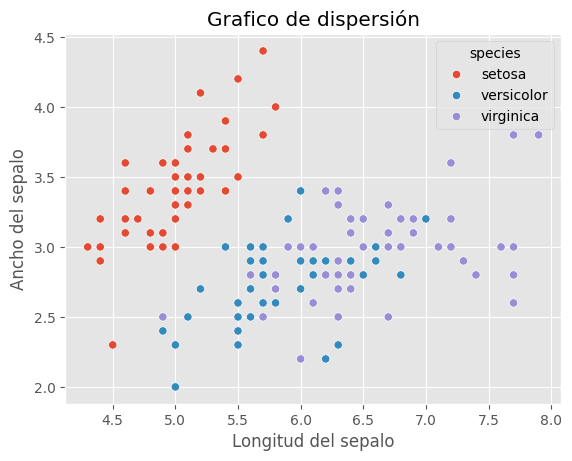

In [81]:
# Grafico de dispersion
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Grafico de dispersión")
plt.show()

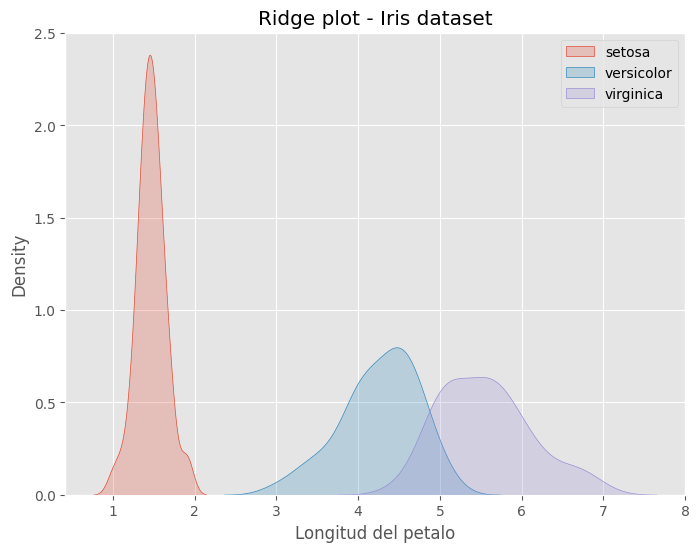

In [83]:
# Grafica de Ridgeplot
setosa = data[data["species"] == "setosa"]
versicolor = data[data["species"] == "versicolor"]
virginica = data[data["species"] == "virginica"]

# Configuramos la figura y los ejes
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Longitud del petalo")

# Crear un ridgeplot usando kdeplot
sns.kdeplot(data=setosa["petal_length"], label="setosa", ax = ax, fill=True)
sns.kdeplot(data=versicolor["petal_length"], label="versicolor", ax = ax, fill=True)
sns.kdeplot(data=virginica["petal_length"], label="virginica", ax = ax, fill=True)

# Ajustamos la posicion de las leyendas
ax.legend(loc="upper right")

plt.title("Ridge plot - Iris dataset")
plt.show()

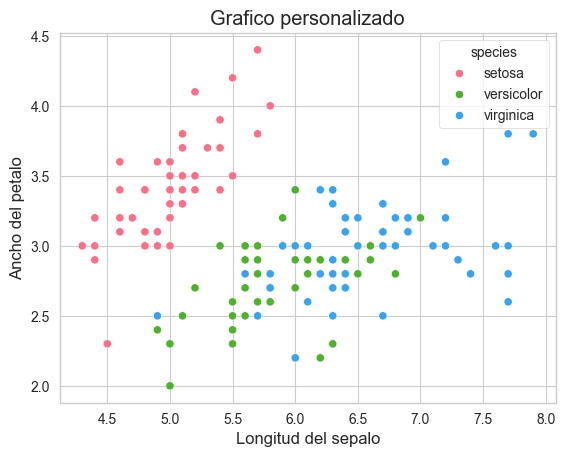

In [84]:
# Grafico de dispersion
sns.set_style("whitegrid")
palette = sns.color_palette("husl" ,3)

sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data, palette=palette)
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del petalo")
plt.title("Grafico personalizado")
plt.show()